##Question B. Download the dataset from
https://www.kaggle.com/datasets/mathchi/diabetes-data-set .

###i) Pose a research question.
###ii) Analyze the data following appropriate descriptive statistical methods,
hypothesis testing, correlation etc. in order to answer the posed research
question.  (use appropriate visualization tool, programming)

# Detailed Statistical Analysis of Diabetes Dataset
This notebook performs statistical analysis on the Diabetes dataset, including:
- Data loading
- Descriptive statistics
- Principle Component Analysis to find most important features
- Visualization of Data Distribution
- Possible Research Question or Hypothesis Generation
- Hypothesis testing
- Correlation analysis & visualization

##Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Display the first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Statistics

In [2]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Principle Component Analysis to find Most Important Features

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecting features (excluding the Outcome column)
X = df.drop(columns=['Outcome'])

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=len(X.columns))  # Keep all components
pca.fit(X_scaled)

# Identifying important features (PCA loadings)
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(X.columns))])

# Find the most important features (absolute highest loadings in the first principal component)
important_features = pca_loadings.loc['PC1'].abs().sort_values(ascending=False).index.tolist()

# Print the top features in order of importance
print("Most Important Features based on PCA:", important_features)

Most Important Features based on PCA: ['BMI', 'SkinThickness', 'Insulin', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies']


## Visualization of Data Distribution

###BMI

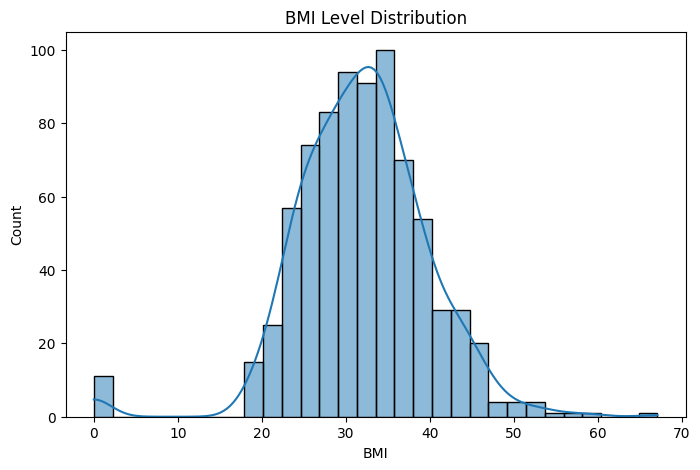

In [4]:
# Distribution of BMI levels
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('BMI Level Distribution')
plt.show()

###Skin Thickness

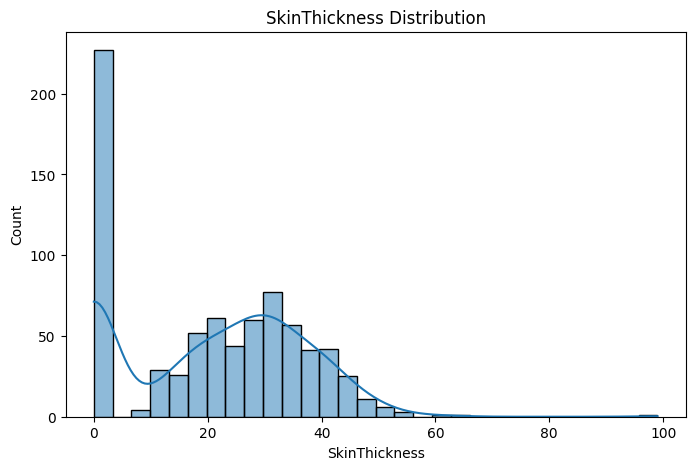

In [5]:
# Distribution of Skin Thickness levels
plt.figure(figsize=(8,5))
sns.histplot(df['SkinThickness'], bins=30, kde=True)
plt.title('SkinThickness Distribution')
plt.show()

###Insulin

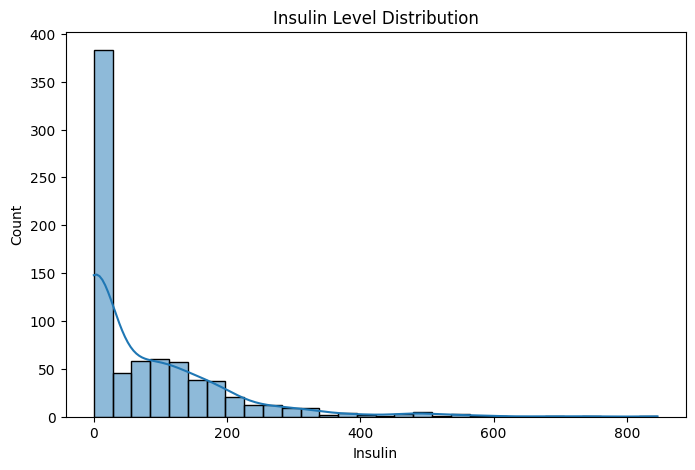

In [6]:
# Distribution of insulin levels
plt.figure(figsize=(8,5))
sns.histplot(df['Insulin'], bins=30, kde=True)
plt.title('Insulin Level Distribution')
plt.show()

###Glucose

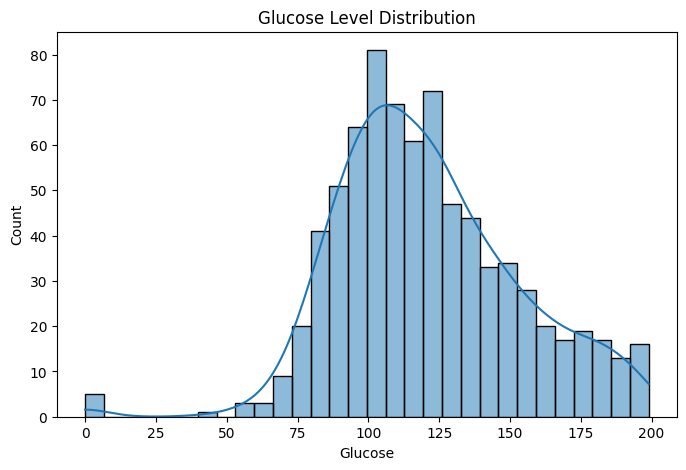

In [7]:
# Distribution of glucose levels
plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title('Glucose Level Distribution')
plt.show()

###Blood Pressure

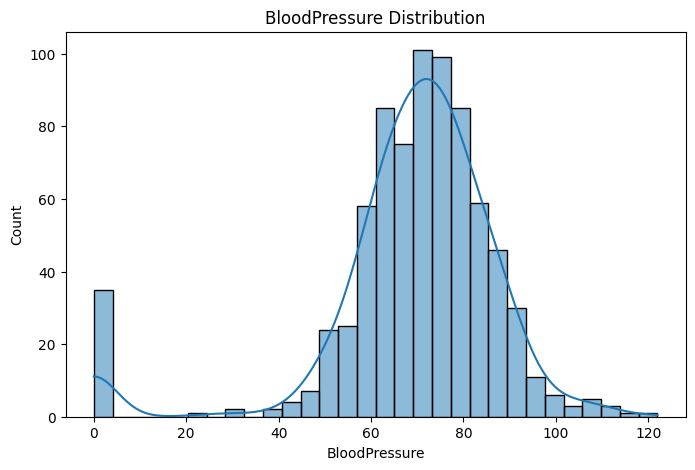

In [8]:
# Distribution of blood pressure
plt.figure(figsize=(8,5))
sns.histplot(df['BloodPressure'], bins=30, kde=True)
plt.title('BloodPressure Distribution')
plt.show()

###DiabetesPedigreeFunction

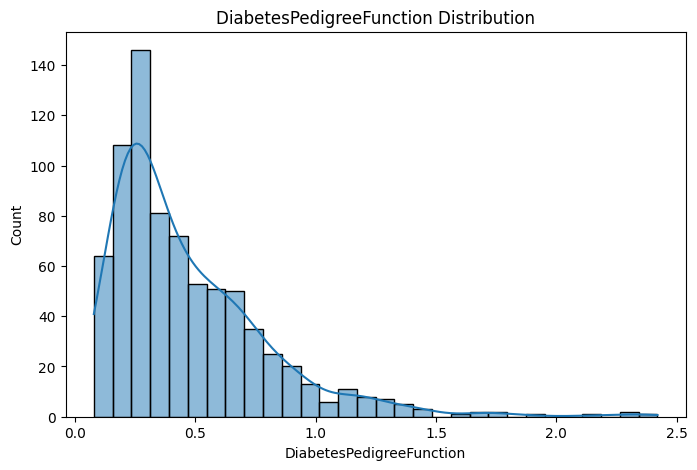

In [9]:
# Distribution of DiabetesPedigreeFunction
plt.figure(figsize=(8,5))
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('DiabetesPedigreeFunction Distribution')
plt.show()

###Age

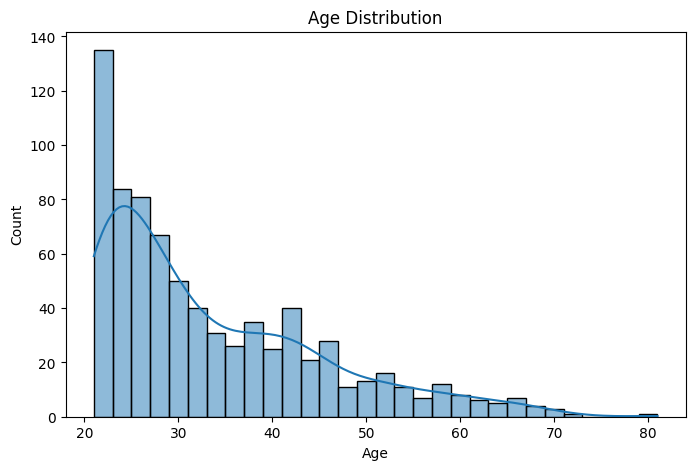

In [10]:
# Distribution of age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

###Pregnencies

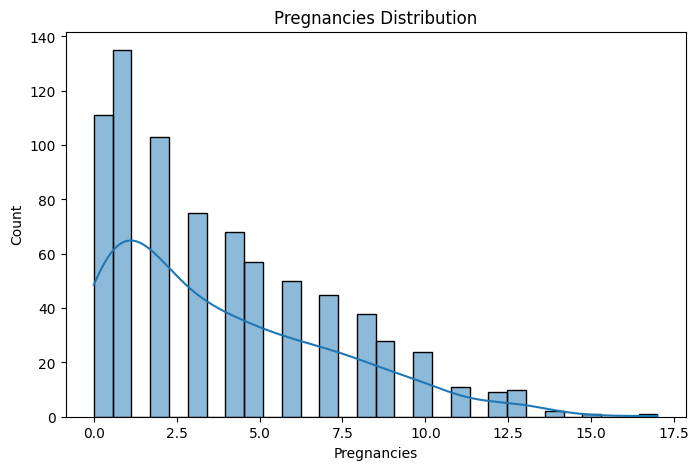

In [12]:
# Distribution of Pregnancies
plt.figure(figsize=(8,5))
sns.histplot(df['Pregnancies'], bins=30, kde=True)
plt.title('Pregnancies Distribution')
plt.show()

##Possible Research Questions or Hypotheses:

1. Do younger people have a lower risk of diabetes?

2. Do pregnant women have a higher risk of diabetes?

3. Does genetic risk of diabetic pedegree significantly affect diabetes?

4. Does glucose level significantly differ between diabetic and non-diabetic patients?

5. Does BMI significantly impact the likelihood of diabetes?

6. Is there a strong correlation between glucose levels and diabetes presence?

7. Do insulin levels differ significantly between diabetic and non-diabetic patients?

8. Does Skin Thickness significantly differ between diabetic and non-diabetic patients?

9. Is Blood Pressure significantly different in diabetic vs. non-diabetic patients?

10. Is there a correlation between Skin Thickness and Blood Pressure?

## Hypothesis Testing
###1.  Do younger people have a lower risk of diabetes?

Null Hypotheses (H₀): There is no significant difference in age between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients are significantly older non-diabetic patients.

Statistical Test:
Mann-Whitney U Test (since age is not normally distributed).

In [14]:
diabetic_age = df[df['Outcome'] == 1]['Age']
non_diabetic_age = df[df['Outcome'] == 0]['Age']

u_stat, p_value = stats.mannwhitneyu(diabetic_age, non_diabetic_age, alternative='greater')
print(f'U-statistic: {u_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Diabetic patients tend to be older.')
else:
    print('Fail to reject H₀: No significant difference in age.')


U-statistic: 92050.0, P-value: 5.711000589809503e-18
Reject H₀: Diabetic patients tend to be older.



###2.  Do pregnant women have a higher risk of diabetes?

Null Hypotheses (H₀): The number of pregnancies does not significantly affect diabetes risk.

Alternative Hypothesis (H₁): A higher number of pregnancies is associated with diabetes.

Statistical Test:
Mann-Whitney U Test

In [15]:
diabetic_pregnancies = df[df['Outcome'] == 1]['Pregnancies']
non_diabetic_pregnancies = df[df['Outcome'] == 0]['Pregnancies']

u_stat, p_value = stats.mannwhitneyu(diabetic_pregnancies, non_diabetic_pregnancies, alternative='greater')
print(f'U-statistic: {u_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: More pregnancies are associated with diabetes.')
else:
    print('Fail to reject H₀: No significant relationship between pregnancies and diabetes.')

U-statistic: 83015.0, P-value: 1.8725732070554234e-08
Reject H₀: More pregnancies are associated with diabetes.


###3. Does diabetes pedigree (genetic risk) significantly affect diabetes?

Null Hypothesis (H₀): Diabetes Pedigree Function does not significantly differ between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients have a significantly higher Diabetes Pedigree Function score.

Statistical Test:
Mann-Whitney U Test

In [16]:
diabetic_pedigree = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
non_diabetic_pedigree = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']

u_stat, p_value = stats.mannwhitneyu(diabetic_pedigree, non_diabetic_pedigree, alternative='greater')
print(f'U-statistic: {u_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Diabetes Pedigree Function is significantly higher in diabetic patients.')
else:
    print('Fail to reject H₀: No significant difference in diabetes pedigree function.')

U-statistic: 81231.0, P-value: 5.982917206959746e-07
Reject H₀: Diabetes Pedigree Function is significantly higher in diabetic patients.



###4. Does glucose level significantly differ between diabetic and non-diabetic patients?

Null Hypotheses (H₀): There is no significant difference in Glucose level between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients have significantly different Glucose compared to non-diabetic patients.

Statistical Test:
T-test (Independent Samples t-test) as normal distribution of data

In [ ]:
# T-test to compare glucose levels
diabetic = df[df['Outcome'] == 1]['Glucose']
non_diabetic = df[df['Outcome'] == 0]['Glucose']
t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic)
print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < 0.05:
    print('Reject null hypothesis: Glucose levels significantly differ')
else:
    print('Fail to reject null hypothesis: No significant difference in glucose levels')

T-statistic: 14.600060005973894, P-value: 8.935431645289912e-43
Reject null hypothesis: Glucose levels significantly differ


###5. Does BMI significantly impact the likelihood of diabetes?

Null Hypotheses (H₀): There is no significant difference in BMI level between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients have significantly different BMI compared to non-diabetic patients.

Statistical Test:
T-test (Independent Samples t-test) as normal distribution of data

In [ ]:
diabetic_bmi = df[df['Outcome'] == 1]['BMI']
non_diabetic_bmi = df[df['Outcome'] == 0]['BMI']

t_stat, p_value = stats.ttest_ind(diabetic_bmi, non_diabetic_bmi)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: BMI significantly differs between diabetic and non-diabetic patients.')
else:
    print('Fail to reject H₀: No significant difference in BMI.')

T-statistic: 8.47183994786525, P-value: 1.2298074873116022e-16
Reject H₀: BMI significantly differs between diabetic and non-diabetic patients.


###6. Is there a strong correlation between glucose levels and diabetes presence?

Null Hypothesis (H₀): There is no significant correlation between glucose levels and diabetes.

Alternative Hypothesis (H₁): Higher glucose levels are significantly correlated with diabetes.

Statistical Test:
Point-Biserial Correlation (since Outcome is binary)

In [ ]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(df['Glucose'], df['Outcome'])
print(f'Correlation Coefficient: {corr}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Glucose levels are significantly correlated with diabetes presence.')
else:
    print('Fail to reject H₀: No significant correlation between glucose and diabetes.')

Correlation Coefficient: 0.4665813983068741, P-value: 8.935431645289604e-43
Reject H₀: Glucose levels are significantly correlated with diabetes presence.


###7. Do insulin levels differ significantly between diabetic and non-diabetic patients?

Null Hypothesis (H₀): There is no significant difference in insulin levels between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Insulin levels are significantly different between the two groups.

Statistical Test:
Mann-Whitney U Test (for non-normally distributed insulin levels)

In [ ]:
diabetic_insulin = df[df['Outcome'] == 1]['Insulin']
non_diabetic_insulin = df[df['Outcome'] == 0]['Insulin']

u_stat, p_value = stats.mannwhitneyu(diabetic_insulin, non_diabetic_insulin)
print(f'U-statistic: {u_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Insulin levels significantly differ between diabetic and non-diabetic patients.')
else:
    print('Fail to reject H₀: No significant difference in insulin levels.')

U-statistic: 72073.5, P-value: 0.06566036997824368
Fail to reject H₀: No significant difference in insulin levels.


###8. Does Skin Thickness significantly differ between diabetic and non-diabetic patients?

Null Hypothesis (H₀): There is no significant difference in Skin Thickness between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients have significantly different Skin Thickness compared to non-diabetic patients.

Statistical Test:
Mann-Whitney U Test (since Skin Thickness is not be normally distributed).

In [ ]:
diabetic_skin = df[df['Outcome'] == 1]['SkinThickness']
non_diabetic_skin = df[df['Outcome'] == 0]['SkinThickness']

u_stat, p_value = stats.mannwhitneyu(diabetic_skin, non_diabetic_skin)
print(f'U-statistic: {u_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Skin Thickness significantly differs between diabetic and non-diabetic patients.')
else:
    print('Fail to reject H₀: No significant difference in Skin Thickness.')

U-statistic: 74186.0, P-value: 0.012961829559891893
Reject H₀: Skin Thickness significantly differs between diabetic and non-diabetic patients.


###9. Is Blood Pressure significantly different in diabetic vs. non-diabetic patients?

Null Hypothesis (H₀): Blood Pressure levels are not significantly different between diabetic and non-diabetic patients.

Alternative Hypothesis (H₁): Diabetic patients have significantly different Blood Pressure levels.

Statistical Test:
T-test (Independent Samples t-test)

In [ ]:
diabetic_bp = df[df['Outcome'] == 1]['BloodPressure']
non_diabetic_bp = df[df['Outcome'] == 0]['BloodPressure']

t_stat, p_value = stats.ttest_ind(diabetic_bp, non_diabetic_bp)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Blood Pressure significantly differs between diabetic and non-diabetic patients.')
else:
    print('Fail to reject H₀: No significant difference in Blood Pressure.')

T-statistic: 1.8047023017353887, P-value: 0.07151390009776082
Fail to reject H₀: No significant difference in Blood Pressure.


###10. Is there a correlation between Skin Thickness and Blood Pressure?

Null Hypothesis (H₀): There is no significant correlation between Skin Thickness and Blood Pressure.

Alternative Hypothesis (H₁): Skin Thickness and Blood Pressure are significantly correlated.

Statistical Test:
Pearson Correlation Test

In [ ]:
corr, p_value = stats.pearsonr(df['SkinThickness'], df['BloodPressure'])
print(f'Correlation Coefficient: {corr}, P-value: {p_value}')

if p_value < 0.05:
    print('Reject H₀: Skin Thickness and Blood Pressure are significantly correlated.')
else:
    print('Fail to reject H₀: No significant correlation between Skin Thickness and Blood Pressure.')

Correlation Coefficient: 0.20737053840307088, P-value: 6.6066874605189064e-09
Reject H₀: Skin Thickness and Blood Pressure are significantly correlated.


## Correlation Analysis

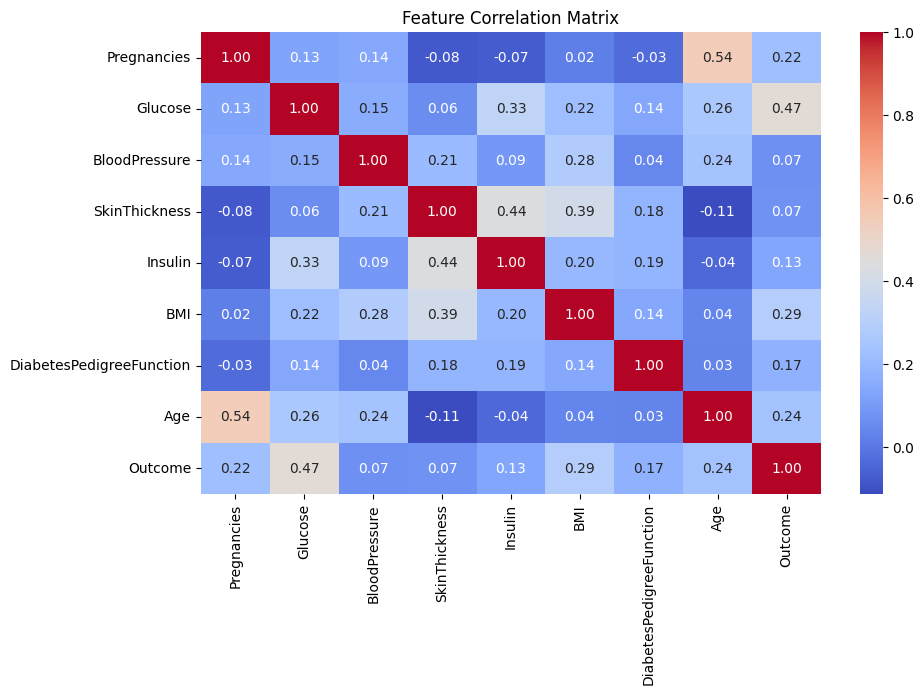

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()